In [ ]:
#REMEMBER AS EVERY FEATURE ENGINEEIRING STEP, HERE ALSO WE NEED TO DO THIS AFTER TRAIN TEST SPLIT ONLY
#HERE JUST FOR EASYNESS SKIPPING THOSE

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification

In [ ]:
#lets download imbalance learn library

In [1]:
#pip install imblearn

# UnderSampling

In [ ]:
#undersampling is ofcourse not a good technique
#but using undersampling along with oversampling may provide excellent result also so cant neglect this

## 1. Random Undersampling

In [ ]:
#it picks random samples from majority class till our stopping criteria or required ratio is reached.
#here i have done 1:1, u can play with sampling strategy for different ratios and also multiclass

In [48]:
from imblearn.under_sampling import RandomUnderSampler

In [45]:
# generating a dataset for binary class for this demo
blobs_random_seed = 42
centers = [(0, 0), (5, 5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# Generate X
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std)

# transform arrays to pandas formats
X = pd.DataFrame(X, columns=['VarA', 'VarB'])
y = pd.Series(y)

# create an imbalancced Xset
# (make blobs creates same number of obs per class
# we need to downsample manually)
X = pd.concat([
    X[y == 0],
    X[y == 1].sample(200, random_state=42)
], axis=0)

y = y.loc[X.index]


In [47]:
X.head()

,VarA,VarB
0,0.196907,0.081658
2,-0.474708,0.743805
8,-2.203590,2.261350
9,-0.011758,-0.099440
10,0.677836,-0.544681


In [49]:
rus=RandomUnderSampler(random_state=1,sampling_strategy="auto")

In [50]:
x_res,y_res=rus.fit_resample(X,y)

In [56]:
X.shape,y.shape

((1000, 2), (1000,))

In [54]:
x_res.shape,y_res.shape

((400, 2), (400,))

In [55]:
y.value_counts()

0    800
1    200
dtype: int64

In [57]:
y_res.value_counts()

0    200
1    200
dtype: int64

## 2. Tomek links

In [ ]:
#this is a cleaning -type of under sampling
#that means here we remove noisy observations from majority class so this is better than removing randomly
#even this also can be used in multiclass
#here we cant decide how much ratio we want, it only removes noise(tomik links points) as per the this algorithm.

In [58]:
from imblearn.under_sampling import TomekLinks

In [78]:
#creating dataset
def make_data(sep):
    
    # returns arrays
    X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           weights=[0.99],
                           class_sep=sep,# how separate the classes are
                           random_state=1)
    
    # trasform arrays into pandas df and series
    X = pd.DataFrame(X, columns =['varA', 'varB'])
    y = pd.Series(y)
    
    return X, y

X, y = make_data(sep=0.5)

In [79]:
X.head()

,varA,varB
0,0.369247,0.686136
1,1.051108,1.310329
2,0.793619,0.510946
3,0.619889,1.132518
4,0.542356,0.621529


In [80]:
y.value_counts()

0    983
1     17
dtype: int64

In [81]:
tm=TomekLinks(sampling_strategy="auto")

In [82]:
x_res,y_res=tm.fit_resample(X,y)

In [83]:
X.shape,x_res.shape

((1000, 2), (988, 2))

In [84]:
#we can see only 12 observations are removed, which are tomik links

In [85]:
y_res.value_counts()

0    971
1     17
dtype: int64

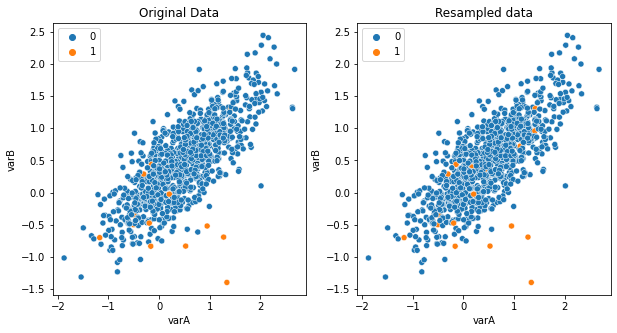

In [86]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(data=X,x="varA",y="varB",hue=y,ax=ax[0])
sns.scatterplot(data=x_res,x="varA",y="varB",hue=y_res,ax=ax[1])
ax[0].set_title("Original Data")
ax[1].set_title("Resampled data");

In [ ]:
#in the chart above we can observe that, in right chart some yellow points 
#are now visible which was hidden behind the blue points in first chart
#this is because we removed those 12 points which was neighbour of yellow 

# OverSampling

## 1. Random Oversampling 

In [ ]:
#this is a over sampling technique

In [2]:
from imblearn.over_sampling import RandomOverSampler

In [15]:
# generating a dataset for binary class for this demo
blobs_random_seed = 42
centers = [(0, 0), (5, 5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# Generate X
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std)

# transform arrays to pandas formats
X = pd.DataFrame(X, columns=['VarA', 'VarB'])
y = pd.Series(y)

# create an imbalancced Xset
# (make blobs creates same number of obs per class
# we need to downsample manually)
X = pd.concat([
    X[y == 0],
    X[y == 1].sample(200, random_state=42)
], axis=0)

y = y.loc[X.index]


In [8]:
X.head()

,VarA,VarB
4,0.056212,-0.157051
6,-2.488385,3.391523
10,1.422823,-1.081708
11,1.931410,-1.110178
13,-1.124492,-0.905799


In [11]:
y.value_counts()

0    800
1    200
dtype: int64

In [16]:
ros=RandomOverSampler(sampling_strategy="auto"  #samples only the minority class
                  ,random_state=0           #for reproducibility    
                 )  

In [17]:
x_res,y_res=ros.fit_resample(X,y)

In [18]:
X.shape,y.shape

((1000, 2), (1000,))

In [19]:
x_res.shape,y_res.shape

((1600, 2), (1600,))

In [20]:
y_res.value_counts()

0    800
1    800
dtype: int64

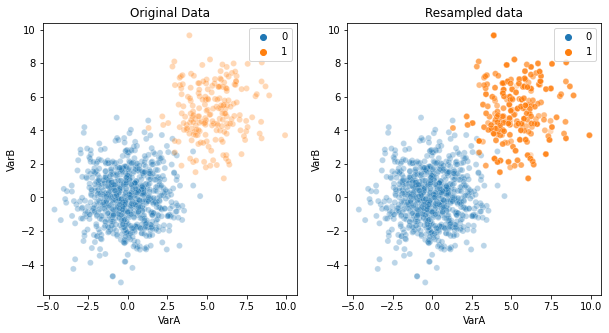

In [33]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(data=X,x="VarA",y="VarB",hue=y,alpha=0.3,ax=ax[0])
sns.scatterplot(data=x_res,x="VarA",y="VarB",hue=y_res,alpha=0.3,ax=ax[1])
ax[0].set_title("Original Data")
ax[1].set_title("Resampled data");

In [34]:
#we can clearly see that this random over sampling is just extracting/repeating random samples from the minority class
#so the colour is darker and no new  data is generated 

### for multi class demo

In [137]:
# Create some toy data

# Configuration options
blobs_random_seed = 42
centers = [(0, 0), (5, 5), [-1, 5]]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# Generate X
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std,
)

# transform arrays to pandas formats
X = pd.DataFrame(X, columns=['VarA', 'VarB'])
y = pd.Series(y)

# create an imbalancced Xset
# (make blobs creates same number of obs per class
# we need to downsample manually)
X = pd.concat([
    X[y == 0],
    X[y == 1].sample(100, random_state=42),
    X[y == 2].sample(100, random_state=42)
], axis=0)

y = y.loc[X.index]

In [138]:
X.head()

,VarA,VarB
0,0.090904,-0.787290
6,-0.891713,-0.872689
7,1.178519,-1.098591
16,-1.590658,0.084301
17,1.952259,-1.561927


In [37]:
y.value_counts()

0    534
1    100
2    100
dtype: int64

In [38]:
ros=RandomOverSampler(sampling_strategy="not majority"  #samples all except majority class
                  ,random_state=0           #for reproducibility    
                 )  

In [39]:
x_res,y_res=ros.fit_resample(X,y)

In [40]:
y_res.value_counts()

0    534
1    534
2    534
dtype: int64

In [41]:
X.shape,y.shape

((734, 2), (734,))

In [42]:
x_res.shape,y_res.shape

((1602, 2), (1602,))

In [45]:
X[X.duplicated()]

,VarA,VarB


In [46]:
x_res[x_res.duplicated()]

,VarA,VarB
734,3.993358,4.911618
735,4.666189,1.242267
736,6.066652,4.668650
737,4.874272,5.155277
738,4.874272,5.155277
...,...,...
1597,0.561864,5.676574
1598,0.861740,5.470076
1599,-1.932613,5.532594
1600,-2.995588,6.517865


In [ ]:
#we can see here 868 duplicate rows has been extracted so that makes total count to 1602

### Random oversamping with smoothing

In [ ]:
#inorder to avoid duplicate samples to avoid overfitting we can add some noise factors
#so we similarly extract random samples from minority class and then for them we add noise so there will be no duplicates

In [48]:
X.head()

,VarA,VarB
1,-1.948224,-1.487798
3,0.811848,-0.426205
4,-2.503397,-3.670065
5,1.012780,1.579875
9,-0.098540,-0.730836


In [49]:
y.value_counts()

0    534
1    100
2    100
dtype: int64

In [54]:
X.shape,y.shape

((734, 2), (734,))

In [58]:
ros=RandomOverSampler(sampling_strategy={1:500,2:500}  #specifying what my sample size should be
                  ,random_state=0,                      #for reproducibility
                      shrinkage=1                      #adding noise
                    )  

In [59]:
x_res,y_res=ros.fit_resample(X,y)

In [60]:
x_res.shape,y_res.shape

((1534, 2), (1534,))

In [61]:
#since we speicied 500 needs ot be size after
y_res.value_counts()

0    534
1    500
2    500
dtype: int64

In [62]:
#since we added noise after extracting random samples, it doesnt create duplicates like before
x_res[x_res.duplicated()]

,VarA,VarB


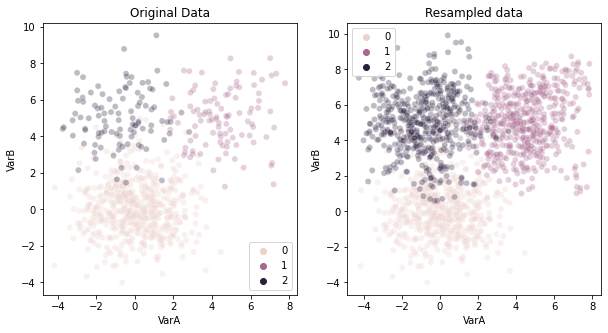

In [63]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(data=X,x="VarA",y="VarB",hue=y,alpha=0.3,ax=ax[0])
sns.scatterplot(data=x_res,x="VarA",y="VarB",hue=y_res,alpha=0.3,ax=ax[1])
ax[0].set_title("Original Data")
ax[1].set_title("Resampled data");

## 2. SMOTE

### for only continous variables

In [39]:
# Create some toy data

# Configuration options
blobs_random_seed = 42
centers = [(0, 0), (5, 5), [-1, 5]]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# Generate X
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std,
)

# transform arrays to pandas formats
X = pd.DataFrame(X, columns=['VarA', 'VarB'])
y = pd.Series(y)

# create an imbalancced Xset
# (make blobs creates same number of obs per class
# we need to downsample manually)
X = pd.concat([
    X[y == 0],
    X[y == 1].sample(100, random_state=42),
    X[y == 2].sample(100, random_state=42)
], axis=0)

y = y.loc[X.index]

In [64]:
#Synthetic minority oversampling technique
#it creates new synthetic data point based on knn
#therefore no duplicates 

In [41]:
from imblearn.over_sampling import SMOTE

In [239]:
X.head()

,VarA,VarB
5,0.056364,0.330790
9,-0.567530,0.387825
12,-0.255197,1.111224
13,-2.195153,0.079253
16,-0.443426,1.657601


In [240]:
y.value_counts()

0    534
1    100
2    100
dtype: int64

In [241]:
X.shape,y.shape

((734, 2), (734,))

In [42]:
smt=SMOTE(sampling_strategy="not majority",random_state=0,k_neighbors=5)

In [43]:
x_res,y_res=smt.fit_resample(X,y)

In [244]:
x_res.shape,y_res.shape

((1602, 2), (1602,))

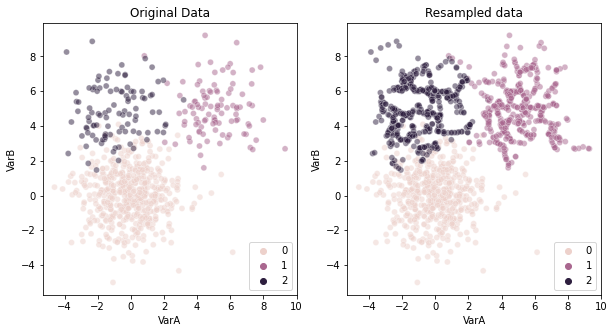

In [245]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(data=X,x="VarA",y="VarB",hue=y,alpha=0.5,ax=ax[0])
sns.scatterplot(data=x_res,x="VarA",y="VarB",hue=y_res,alpha=0.5,ax=ax[1])
ax[0].set_title("Original Data")
ax[1].set_title("Resampled data");

In [246]:
y_res.value_counts()

0    534
1    534
2    534
dtype: int64

### for continuos+categorical

In [14]:
l=[0,1,2,3,4,5,6,7]*91+[0,1,2,3,4,5]

In [15]:
np.random.shuffle(l)

In [16]:
X["VarC"]=l

In [17]:
X.head()

,VarA,VarB,VarC
1,-0.248509,-2.157789,3
10,-2.283039,-0.342703,6
12,-2.091639,2.162855,4
14,2.471727,3.158916,1
15,0.836675,1.128666,5


In [260]:
smt=SMOTE(sampling_strategy="not majority",random_state=0,k_neighbors=5)
x_res,y_res=smt.fit_resample(X,y)
x_res.shape,y_res.shape

((1602, 3), (1602,))

In [262]:
X["VarC"].value_counts()

0    92
4    92
3    92
1    92
2    92
5    92
6    91
7    91
Name: VarC, dtype: int64

In [263]:
x_res['VarC'].value_counts()

4    262
0    207
6    201
2    196
3    195
5    188
7    179
1    174
Name: VarC, dtype: int64

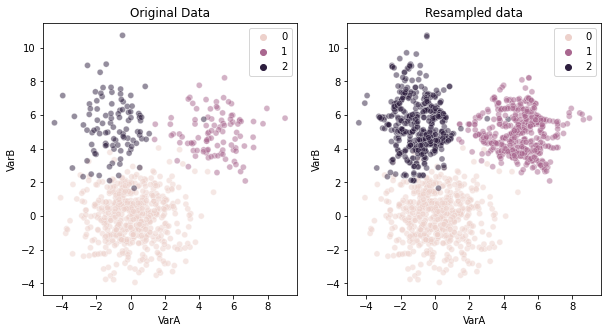

In [264]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(data=X,x="VarA",y="VarB",hue=y,alpha=0.5,ax=ax[0])
sns.scatterplot(data=x_res,x="VarA",y="VarB",hue=y_res,alpha=0.5,ax=ax[1])
ax[0].set_title("Original Data")
ax[1].set_title("Resampled data");

In [ ]:
#from what i studied or saw smote may not work properly for categorical variables since while creating new synthetic points
#we may get some meaningless points, for example in VarC is discrete variable which has only 8 unique points [0,7],
#if new generated point is some point like 2.45 its ofcourse wrong
#but here i am getting proper answer in my demo not sure why
#but keep in mind that for mixed variables use smotenc

In [4]:
from imblearn.over_sampling import SMOTENC

In [35]:
# Cgenerating new data
blobs_random_seed = 42
centers = [(0, 0), (5, 5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# Generate X
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std)

# transform arrays to pandas formats
X = pd.DataFrame(X, columns=['VarA', 'VarB'])
y = pd.Series(y)

# add categorical features
rng = np.random.RandomState(42)
X['VarC'] = rng.choice(['A', 'B', 'C'], size=num_samples_total).astype(object)
X['VarD'] = rng.choice(['Blue', 'Green', 'Red'], size=num_samples_total).astype(object)

# create an imbalancced Xset
# (make blobs creates same number of obs per class
# we need to downsample manually)
X = pd.concat([
    X[y == 0],
    X[y == 1].sample(200, random_state=42)
], axis=0)

y = y.loc[X.index]

# display size
X.shape, y.shape

((1000, 4), (1000,))

In [36]:
#in smotenc no need to encode also
X.head()

,VarA,VarB,VarC,VarD
3,-0.446761,-0.749669,C,Red
4,-0.187522,1.687274,A,Blue
5,2.073766,-0.852000,A,Green
6,-1.305365,0.802358,C,Green
7,0.141408,0.473843,B,Blue


In [37]:
y.value_counts()

0    800
1    200
dtype: int64

In [38]:
smt=SMOTENC(sampling_strategy="auto",random_state=0,k_neighbors=2,categorical_features=[2,3])

In [34]:
#smt.fit_resample(X,y)

In [ ]:
#this is how to implement this but there is some error with versions so not getting outputs so leaving this as it is

- if u have only categorical variables  use smoten

In [44]:
from imblearn.over_sampling import SMOTEN

# Combining under sampling and over sampling

In [ ]:
#so the over sampling can increase noise but it retains all data
#while in undersampling it removes noise as we saw in technique like tomek links but it reduces data
#now if we combine both of these we can include best things of both of these techniques
#that means we can retain the original data and also reduce noisy observations

In [ ]:
#while combining its best to use over sampling techniques where we generate data like smote
#and in undersampling use technique that reduces noise like tomek links
#so lets see demo of smote+tomeklinks here

In [87]:
from imblearn.combine import SMOTETomek

In [88]:
#creating data
def make_data(sep):
    
    # returns arrays
    X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           weights=[0.99],
                           class_sep=sep,# how separate the classes are
                           random_state=1)
    
    # trasform arrays into pandas df and series
    X = pd.DataFrame(X, columns =['VarA', 'VarB'])
    y = pd.Series(y)
    
    return X, y

X, y = make_data(sep=2)

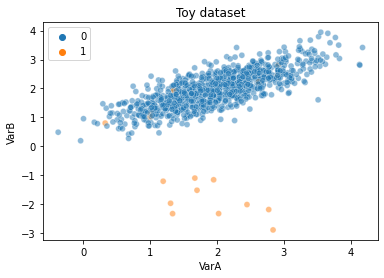

In [89]:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

In [93]:
sm=SMOTE(sampling_strategy="auto",k_neighbors=3)
tm=TomekLinks(sampling_strategy="auto")

In [94]:
st=SMOTETomek(smote=sm,tomek=tm,sampling_strategy="auto",random_state=1)

In [95]:
x_st,y_st=st.fit_resample(X,y)

In [96]:
X.shape,y.shape

((1000, 2), (1000,))

In [97]:
x_st.shape,y_st.shape

((1917, 2), (1917,))

In [98]:
y.value_counts()

0    983
1     17
dtype: int64

In [99]:
y_st.value_counts()

0    983
1    934
dtype: int64

In [ ]:
#SO THIS FIRST APPLIED SMOTE AND CREATED NEW DATA POINTS AND THEN USED TOMEKLINKS AND REMOVED NOISY OBSERVATIONS

# Cost Sensitive Learning